# Experimento 3: Casamento de Impedâncias

**Nome:** Lucas Guimarães Braga **RA:** 182543

**Nome:** Lucas Zenichi Terada **RA:** 182775

**Nome:** Nícolas Franco Rufino Almeida Prado **RA:** 185142

In [1]:
# Helper imports and definitions

import numpy
from matplotlib import pyplot

%matplotlib inline

def float2(s):
    return float(s.replace(b',', b'.'))

def load_spectrum_csv(filename):
    data = numpy.loadtxt(filename, delimiter=';', skiprows=15, usecols=[0, 1], converters={0: float2, 1: float2})
    return tuple(data[:, i] for i in range(data.shape[1]))

# Introdução

Em experimentos anteriores estudaram-se os efeitos gerados a partir de cargas alimentadas através de linhas de transmissão descasadas.
Além de evitar a reflexão de potência em direção ao gerador, o casamento de impedâncias torna a impedância de entrada do circuito vista pelo gerador independente do comprimento da linha de transmissão.

Há inúmeras maneiras de se projetar uma rede de casamento, cuja finalidade é transformar a impedância de entrada da carga na impedância da linha de alimentação.
Redes mais complexas possibilitam, em geral, efetuar o casamento em uma banda mais larga de frequência, enquanto as mais simples apresentam menos graus de liberdade e por isso não oferecem a mesma flexibilidade.
Quanto à implementação, o casador pode ser composto de elementos de circuito concentrados ou, o que é bastante comum, das próprias linhas de transmissão.
Uma grande vantagem de se usar trechos de linha para compor a rede são as baixas perdas, já que as linhas são feitas para operar em altas frequências.
Elementos concentrados apresentam mais perdas e comportamento atípico dependendo da frequência de operação.

O casador mais simples de ser projetado com linhas de transmissão é o de quarto de onda.
No entanto ele permite apenas o casamento de cargas resistivas (no caso de casamento a uma linha sem perdas), além de requerer o projeto de um trecho de linha com impedância característica específica, o que pode ser simples (no caso de microfitas, por exemplo) ou bastante complexo (como em cabos coaxiais).

Este experimento demonstra o casador de toco simples.
O toco será terminado em curto-circuito e será conectado em paralelo à carga, como ilustrado na figura seguinte.

![Circuito esquemático do casador de toco simples](attachment:fig-3-1.svg "Circuito esquemático do casador de toco simples")

A execução do projeto pode ser realizada numericamente através da equação de transformação de impedância ao longo da linha de transmissão:

\begin{align}
& Z(z) = Z_0\frac{1 + \Gamma(z)}{1 - \Gamma(z)} \\
& \Gamma(z) = \Gamma_Le^{i2\beta z} \\
& \Gamma_L = \frac{Z_L - Z_0}{Z_L + Z_0}
\end{align}

ou graficamente na carta de Smith (figura abaixo) seguindo os seguintes passos:

1. Localizar $\tilde Y_L$ diametralmente oposto a $\tilde Z_L = \frac{Z_L}{Z_0}$ na circunferência de $|\Gamma_L|$ constante;
1. Mover-se ao longo dessa circunferência em direção ao gerador até uma das interseções com a circunferência $\tilde G=1$ (tracejada);
1. Determinar a condutância normalizada $\tilde Y_d$ da interseção e o comprimento percorrido $d$;
1. Localizar a admitância da extremidade do toco (zero ou infinita);
1. Mover-se em direção ao gerador até atingir a susceptância $\tilde Y_l = 1 - \tilde Y_d$, determinando o comprimento $l$ do toco.

![Projeto do casador na carta de Smith](attachment:fig-3-2.svg "Projeto do casador na carta de Smith")

## Projeto do casador de impedâncias

Neste experimento você deverá projetar e caracterizar um casador entre uma carga de 150 Ω e um cabo coaxial RG-58, que tem impedância característica de 50 Ω.
O casador será do tipo toco simples paralelo terminado em curto e deverá ser projetado para operar em 120 MHz.

Realize o projeto do casador utilizando a carta de Smith.
Inclua uma imagem da carta e descreva o projeto detalhadamente.

![RESPOSTA](smith.png)

**RESPOSTA:** Primeiramente, foi obtida a impedância da carga normalizada em relação à linha, cujo valor foi 3, e marcado esse ponto na carta de Smith. Em seguida, este valor foi transformado em admitância, pegando-se o ponto diametralmente oposto na carta, que foi de aproximandamente 0.34. Então, a partir do ponto da admitância da carga, caminhou-se sentido gerador (horário) na carta de Smith sobre uma trajetória circular em torno do centro, uma vez que isso garante que o módulo de gama seja constante, até o ponto em que se interceptou a circunferência de parte real de admitância igual a 1. Observando a distância caminhada em comprimentos de onda, foi obtido o comprimento $d/\lambda = 0.114$.

O segundo passo foi verificar a parte imaginária da admitância no último ponto obtido, e marcar o ponto da circunferência mais externa que possuia o conjugado deste valor. Então, caminhou-se do ponto correspondente ao curto-circuito, extremidade direita da circunferência mais externa, no sentido gerador (horário) até o ponto marcado anteriormente. A distância caminhada em comprimentos de onda corresponde a $l/\lambda = 0.1678$.

Com $d = 27.85$cm e $l = 18.92$cm determinados, o projeto do toco simples foi completo e carga encontra-se casada.

A caracterização de um casador de impedância é realizada medindo-se a potência refletida na carga na frequência desejada.

Para medir a potência refletida, realize uma montagem com a ponte direcional disponível em sua bancada.
Caracterize a montagem, verificando sua perda de inserção.

*Dica:* meça a perda total de inserção colocando a carga em curto, que corresponde ao descasamento máximo.

**RESPOSTA:** Utilizando uma ponte direcional, inseriu-se um sinal na entrada que fora transferida para uma linha de 50 $\Omega$ com uma carga em curto em sua extremidade e, utilizando o terminal restante da ponte, verificou-se a potência de **-17.6 dBm** do sinal refletido.

Como o coeficiente de reflexão de uma carta em curto é igual a -1, toda a onda deveria ter sido refletida o que mostra que há uma atenuação de **-17.6 dBm** causada pela ponte.




Meça a reflexão obtida com a carga casada e interprete o resultado.

**RESPOSTA:** Utilizando uma carga casada com a fonte (50 $\Omega$), observou-se uma potência de **-51.0 dBm** de onda refletida. Atribuindo as atenuações causadas pela ponte, o casamento da carga proporciona uma onda propagante de **-33.4 dBm**. Isso mostra que uma carga casada possui, em teoria, um coeficiente de reflexão nulo, o que na prática se mostra como uma grande atenuação na onda refletida.

Meça o valor da potência refletida com a carga de 150 Ω e compare com o valor teórico esperado.

**RESPOSTA:** Com uma carga descasada (150 $\Omega$), verificou-se uma potência da onda refletidada de **-23.6 dBm**. Atribuindo as atenuações causadas pela ponte, a carga descasada proporciona uma onda refletida de **-6 dBm**. Isso ocorre, devido ao aumento do coeficiente de reflexão proporcionado pelo descasamento da linha.

Implemente o casador projetado.

Em quantos decibéis é possível reduzir a potência refletida? 

**RESPOSTA**: Utilizando um toco de 19 cm a uma distância de 28.5 cm da carga descasada (valores obtidos atravéss da carta de smith), obteve-se uma onda refletida de **-30.3 dBm**. Atribuindo a atenuação da ponte, o casador proporcional uma onde refletida de **-12.7 dBm**. Embora seja um valor melhor que o obtido na carga descasada, ainda não está satisfatório quanto com a carga casada. 

Utilize trechos de linha com comprimentos acima e abaixo dos valores projetados para avaliar o comportamento do casador em 120 MHz quando $d$ e $l$ variam.
Além dos comprimentos de $d$ e $l$ projetados, considere 2 valores acima e 2 abaixo, resultando num total de 25 medições.

Plote os resultados medidos em um mapa de cores e analise-os em termos da sensibilidade do projeto.

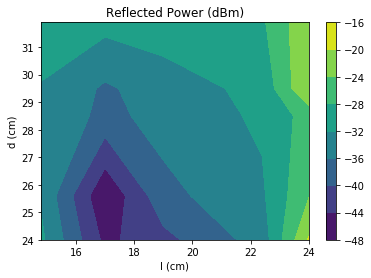

In [2]:
# Length of the short-circuited stub [cm]
l = numpy.array([14.8, 17, 19, 22.4, 24])

# Distance between stub and load [cm]
d = numpy.array([
    24,
    25.6,
    28.5,
    29.5,
    31.9,
])

# Reflected power [dBm]
s11 = numpy.array([
    [-31.20, -45.00, -41.20, -34.20, -19.60],
    [-32.45, -47.60, -37.30, -32.60, -24.20],
    [-32.00, -37.30, -34.40, -31.40, -26.30],
    [-32.20, -36.60, -34.00, -30.80, -20.10],
    [-30.30, -30.70, -29.90, -28.60, -20.60],
])

pyplot.contourf(l, d, s11)
pyplot.colorbar()
pyplot.title('Reflected Power (dBm)')
pyplot.xlabel('l (cm)')
pyplot.ylabel('d (cm)')
pyplot.grid(False)

**RESPOSTA:** Como pode-se perceber, os resultados obtidos indicam que os comprimentos que melhor casam a impedância da carga são $d = 25.6$cm e $l = 17$cm, valores com certa diferença dos calculados teoricamente ($d = 27.85$cm e $l = 18.92$cm).

Essa discrepância mostra como o projeto de casadores de impedância é sensível a pequenas variações de parâmetros, justificando o fluxo típico do projeto de um casador de impedância compreender cálculos teóricos, medições dos valores em protótipos, e reiterações do processo até que os protótipos sejam adequados.

Verifique a faixa de frequência de funcionamento do melhor casador obtido em torno de 120 MHz.

Plote um gráfico de potência refletida em função da frequência utilizando o analisador de espectro no modo *hold max*.
Interprete os resultados.

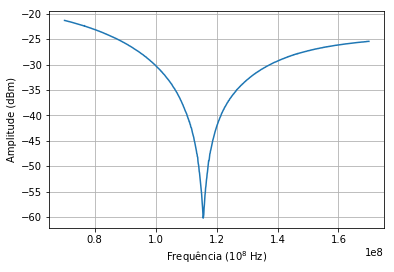

In [3]:
# Plot signals from spectrum analyzer
# Do not forget to modify the axes labels according to your setup
freq, signal = load_spectrum_csv('resp_freq.csv')
pyplot.plot(freq, signal)
pyplot.xlabel('Frequência ($10^8$ Hz)')
pyplot.ylabel('Amplitude (dBm)')
pyplot.grid(True)

**RESPOSTA** É possível constatar que o projeto para o casador (em torno de 120MHz) foi o melhor obtido dado as condições de precisão do experimento, porém com base no gráfico acima, este casador teria um efeito muito melhor se a frequência ao qual estava sendo projetada fosse em torno de 115.6Mhz.

# Orientação para submissão do relatório final

Após finalizar o experimento e o relatório:

1. Gere um arquivo PDF do roteiro completo: clique em *File/Print Preview* e gere o PDF;
1. **Revise** seu relatório;
1. Envie o relatório final pelo site do curso (apenas um aluno envia pelo grupo);
1. Crie um backup do seu relatório (arquivos ipynb e PDF) e guarde com você;
1. Apague os seus arquivos de trabalho do computador.
 
Assegure-se de que:
- O início do relatório indentifica os alunos e os respectivos RAs;
- Todas as figuras foram carregadas apropriadamente e estão legíveis;
- O texto das respostas nas células não está incompleto ou cortado;
- As grandezas apresentadas no texto e nos cálculos possuem unidades;
- Seus resultados sejam referenciados e discutidos no texto.